# Training Artificial Neural Networks (Part 2)

CSI 4106 - Fall 2025

Marcel Turcotte  
Version: Jul 10, 2025 16:54

# Preamble

## Quote of the Day

[Sir Demis
Hassabis](https://www.linkedin.com/in/demishassabis/?originalSubdomain=uk)
is the Co-founder and CEO of [Google DeepMind](https://deepmind.google),
a leading company dedicated to addressing some of the most complex
scientific and engineering challenges of our era to propel scientific
advancement. A chess prodigy from the age of four, Hassabis achieved
master-level proficiency by 13 and served as the captain for several
England junior chess teams. In 2024, he was awarded the Nobel Prize in
[Chemistry](https://www.nobelprize.org/prizes/chemistry/2024/summary/)
for his contributions to the development of
[AlphaFold](https://deepmind.google/technologies/alphafold/).

## Learning objectives

-   **Describe** the functioning of a softmax layer.
-   **Explain** the concept of cross-entropy loss.
-   **Apply** regularization techniques to improve the generalization of
    neural networks.

As with Assignment 2, I have compiled the important concepts for the
next assignment into the lecture notes.

## Summary

-   **Deep learning** is a branch of **machine learning**.
-   It uses **neural networks** organized in **layers**.
-   Each unit computes a **weighted sum** (dot product) of the inputs,
    adds a **bias**, and then applies an **activation function** to
    produce its output.
-   A sufficiently large single-layer network can **approximate any
    continuous function**.

## Backpropagation: General Overview

1.  **Initialization**
2.  **Forward Pass**
3.  **Loss Calculation**
4.  **Backward Pass (Backpropagation)**
5.  **Repeat steps 2 to 5**.

The algorithm **stops** either after a **predefined number of epochs**
or when the **convergence criteria are met**.

# Output layer

## Output Layer: Regression Task

-   **\# of output neurons**:
    -   1 per dimension
-   **Output layer activation function**:
    -   None, *ReLU/softplus*, if positive, *sigmoid/tanh*, if bounded
-   **Loss function**:
    -   [MeanSquaredError](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError)

In an [object detection
problem](https://keras.io/guides/keras_cv/object_detection_keras_cv/),
determining the **bounding box** exemplifies a regression task where the
output is multidimensional.

## Output Layer: Classification Task

-   **\# of output neurons**:
    -   1 if binary, 1 per class, if multi-label or multiclass.
-   **Output layer activation function**:
    -   *sigmoid*, if binary or multi-label, *softmax* if multi-class.
-   **Loss function**:
    -   cross-entropy

## Softmax

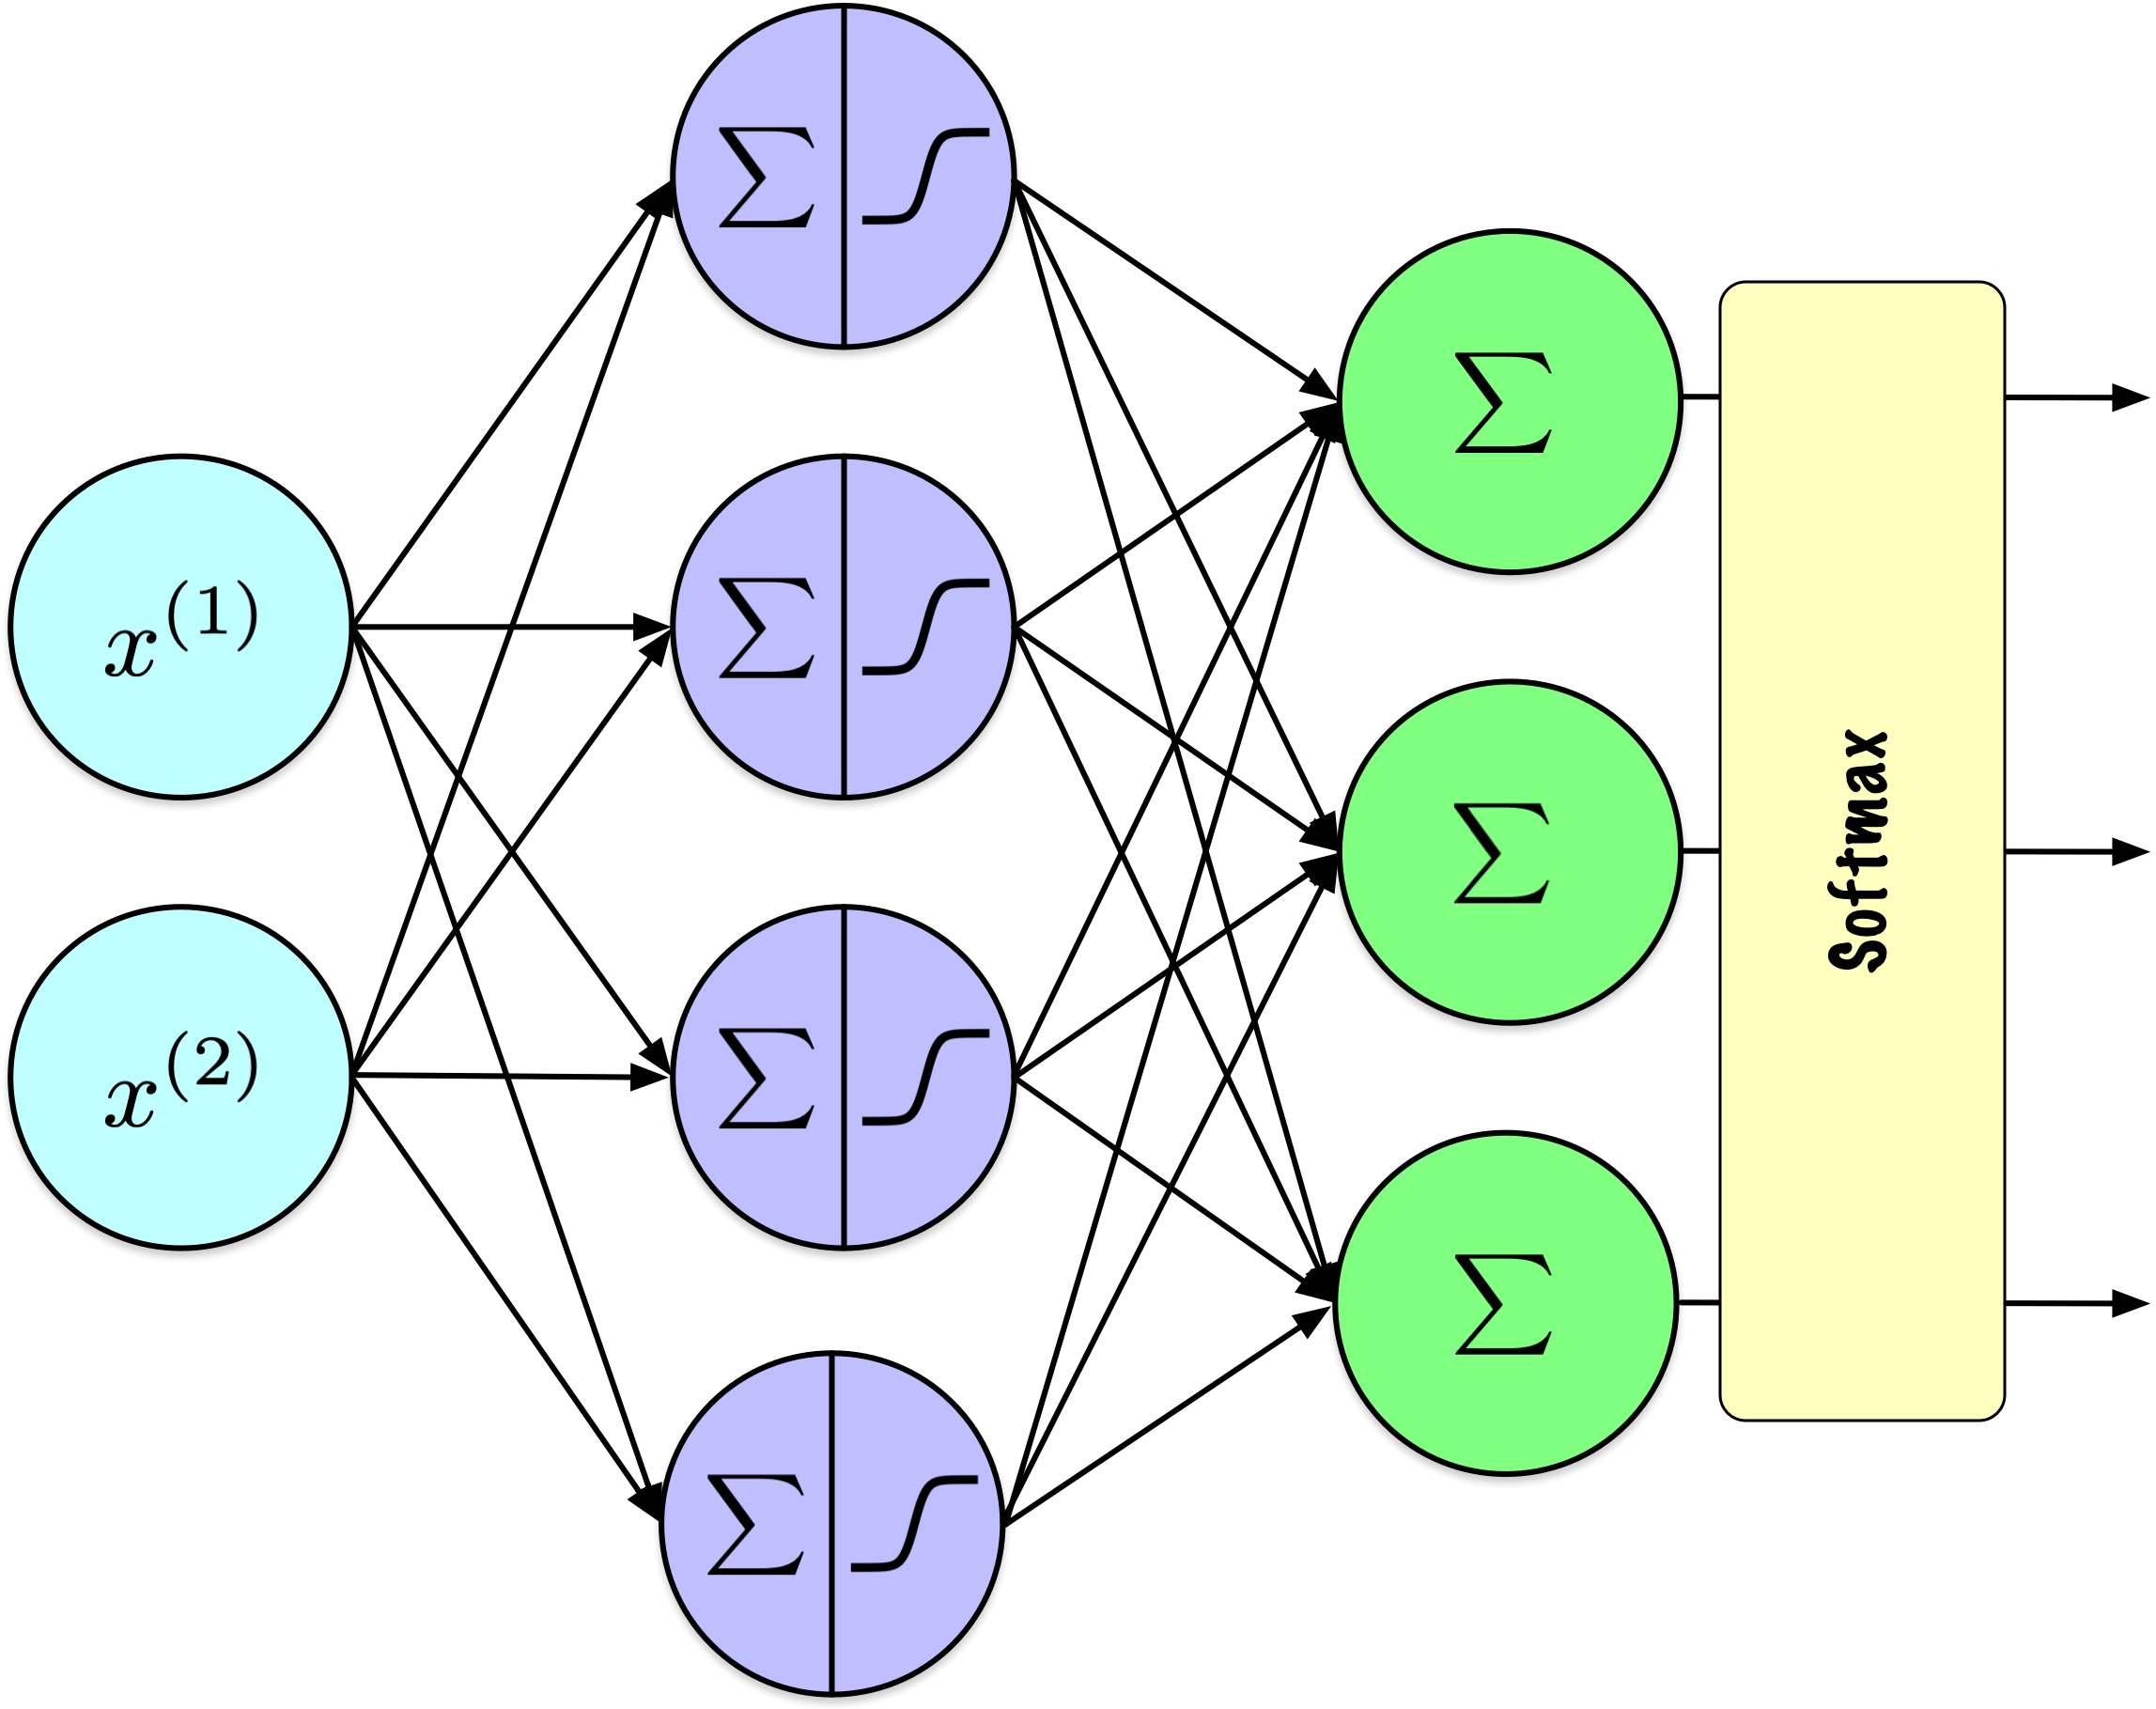

**Softmax** ensures that all activation outputs fall between 0 and 1 and
collectively sum to 1.

Observe that I have revised the representation of the output nodes to
indicate that the softmax function is applied to the entire layer,
rather than to individual nodes. This function transforms the raw output
values of the layer into probabilities that sum to 1, facilitating
multi-class classification. This characteristic distinguishes it from
activation functions like ReLU or sigmoid, which are typically applied
independently to each node’s output.

The $\argmax$ function is not suitable for optimization via
gradient-based methods because its derivative is zero in all cases,
similar to step functions. In contrast, the softmax function offers both
a probabilistic interpretation and a computable derivative, making it
more effective for such applications.

The $\argmax$ function can be applied *a posteriori* to trained networks
for class prediction.

## Softmax

The **softmax** function is an **activation function** used in
**multi-class classification problems** to convert a vector of raw
scores into **probabilities that sum to 1**.

Given a vector $\mathbf{z} = [z_1, z_2, \ldots, z_n]$:

$$
\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

where $\sigma(\mathbf{z})_i$ is the probability of the $i$-th class, and
$n$ is the number of classes.

Softmax emphasizes higher scores while suppressing lower ones, enabling
a probabilistic interpretation of the outputs.

We clearly see that such an activation applies for an entire layer since
the denomination depends on the values of all the $z_j$, for
$j in 1 \ldots n$.

## Softmax

|    $z_1$ |    $z_2$ |    $z_3$ | $\sigma(z_1)$ | $\sigma(z_2)$ | $\sigma(z_3)$ | $\sum$ |
|----------:|----------:|----------:|----------:|----------:|----------:|----------:|
| **1.47** |    -0.39 |     0.22 |      **0.69** |          0.11 |          0.20 |   1.00 |
|     5.00 | **6.00** |     4.00 |          0.24 |      **0.67** |          0.09 |   1.00 |
|     0.90 |     0.80 | **1.10** |          0.32 |          0.29 |      **0.39** |   1.00 |
|    -2.00 | **2.00** |    -3.00 |          0.02 |      **0.98** |          0.01 |   1.00 |

Softmax values for a vector of length 3.

1.  **Maintains Relative Order**: The softmax function preserves the
    relative order of the input values. If one input is greater than
    another, its corresponding output will also be greater.

2.  **Interpreted as probabilities**: Each value is in the range 0 to 1.
    The output values from the softmax function are normalized to sum to
    one, which allows them to be interpreted as probabilities.

3.  **Relative Differences**: When the relative differences among the
    input values are small, the differences in the output probabilities
    remain small, reflecting the input distribution. When the input
    values are identical, the output values will be $\frac{1}{n}$, where
    $n$ is the number of classes.

4.  **Wide Range of Values**: The softmax function can effectively
    handle a wide range of input values, thanks to the exponential
    function and normalization, which scale the inputs to a
    probabilistic range.

These properties make the softmax function particularly useful for
multi-class classification tasks in machine learning.

## Softmax

<https://www.youtube.com/watch?v=KpKog-L9veg>

## Cross-entropy loss function

The **cross-entropy** in a **multi-class classification task** for one
example:

$$
J(W) = -\sum_{k=1}^{K} y_k \log(\hat{y}_k)
$$

Where:

-   $K$ is the **number of classes**.
-   $y_k$ is the **true distribution** for the class $k$.
-   $\hat{y}_k$ is the **predicted probability** of class $k$ from the
    model.

-   The target vector $y$ is expressed as a one-hot encoded vector of
    length $K$, where the element corresponding to the true class is set
    to 1, and all other elements are 0.

-   Consequently, in the summation over classes, only the term
    associated with the true class contributes a non-zero value.

-   Therefore, the cross-entropy loss for a single example is given by
    $-\log(\hat{y}_k)$, where $\hat{y}_k$ is the predicted probability
    for the true class.

-   The predicted probability $\hat{y}_k$ is derived from the softmax
    function applied in the output layer of the neural network.

## Cross-entropy loss function

-   **Classification Problem**: 3 classes
    -   Versicolour, Setosa, Virginica.
-   **One-Hot Encoding**:
    -   Setosa = $[0, 1, 0]$.
-   **Softmax Outputs & Loss**:
    -   $[0.22,\mathbf{0.7}, 0.08]$: Loss = $-\log(0.7) = 0.3567$.
    -   $[0.7, \mathbf{0.22}, 0.08]$: Loss = $-\log(0.22) = 1.5141$.
    -   $[0.7, \mathbf{0.08}, 0.22]$: Loss = $-\log(0.08) = 2.5257$.

Among the softmax outputs, cross-entropy evaluates only the component
corresponding to $k=1$ (Setosa), as the other entries in the one-hot
encoded vector are zero. This relevant element is highlighted in bold.
When the softmax prediction aligns closely with the expected value, the
resulting loss is minimal (0.3567). Conversely, as the prediction
deviates further from the expected value, the loss increases (1.5141 and
2.5257).

## Case: one example

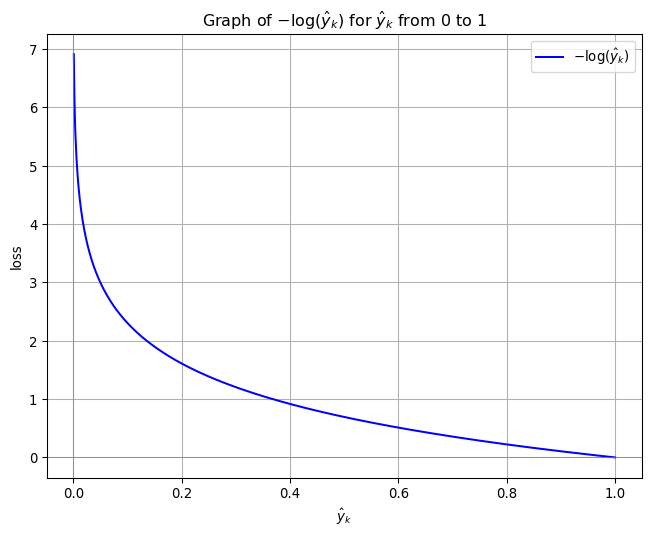

-   In the summation, only the term where $y_k = 1$ contributes a
    non-zero value.

-   Due to the negative sign preceding the summation, the value of the
    function is $-\log(\hat{y}_k$.

-   If the predicted probability $\hat{y}_k$ is near 1, the loss
    approaches zero, indicating minimal penalty.

-   Conversely, as $\hat{y}_k$ nears 0, indicating an incorrect
    prediction, the loss approaches infinity. This substantial penalty
    allows cross-entropy loss to converge more quickly than mean squared
    error.

## Case: dataset

For a dataset with $N$ examples, the **average cross-entropy loss** over
all examples is computed as:

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{i,k} \log(\hat{y}_{i,k})
$$

Where:

-   $i$ indexes over the different **examples** in the dataset.
-   $y_{i,k}$ and $\hat{y}_{i,k}$ are the **true** and **predicted
    probabilities** for class $k$ of example $i$, respectively.

# Regularization

## Definition

**Regularization** comprises a set of techniques designed to enhance a
model’s ability to generalize by **mitigating overfitting**. By
**discouraging excessive model complexity**, these methods **improve**
the model’s **robustness** and **performance** on unseen data.

## Adding penalty terms to the loss

-   In numerical optimization, it is standard practice to **incorporate
    additional terms** into the **objective function** to **deter
    undesirable model characteristics**.

-   For a **minimization problem**, the optimization process aims to
    **circumvent the substantial costs** associated with these **penalty
    terms**.

## Loss function

Consider the **mean absolute error** loss function:

$$
  \mathrm{MAE}(X,W) = \frac{1}{N} \sum_{i=1}^N | h_W(x_i) - y_i |
$$

Where:

-   $W$ are the weights of our network.
-   $h_W(x_i)$ is the output of the network for example $i$.
-   $y_i$ is the true label for example $i$.

## Penalty term(s)

One or more terms can be added to the loss:

$$
  \mathrm{MAE}(X,W) = \frac{1}{N} \sum_{i=1}^N | h_W(x_i) - y_i | + \mathrm{penalty}
$$

## Norm

A **norm** is assigns a non-negative length to a vector.

The **$\ell_p$ norm** of a vector $\mathbf{z} = [z_1, z_2, \ldots, z_n]$
is defined as:

$$
  \|\mathbf{z}\|_p = \left( \sum_{i=1}^{n} |z_i|^p \right)^{1/p}
$$

With larger $p$, the $\ell_p$ norm increasingly highlights larger $z_i$
values due to exponentiation.

A **norm** is a function that assigns a non-negative length or size to
each vector in a vector space, satisfying certain properties:
positivity, scalar multiplication, the triangle inequality, and the
property that the norm is zero if and only if the vector is zero.

## $\ell_1$ and $\ell_2$ norms

The **$\ell_1$ norm** (**Manhattan norm**) is:

$$
  \|\mathbf{z}\|_1 = \sum_{i=1}^{n} |z_i|
$$

The **$\ell_2$ norm** (**Euclidean norm**) is:

$$
  \|\mathbf{z}\|_2 = \sqrt{\sum_{i=1}^{n} z_i^2}
$$

## $\ell_1$ and $\ell_2$ regularization

Below, $\alpha$ and $\beta$ determine the degree of regularization
applied; setting these values to zero effectively disables the
regularization term. $$
  \mathrm{MAE}(X,W) = \frac{1}{N} \sum_{i=1}^N | h_W(x_i) - y_i | + \alpha \ell_1 + \beta \ell_2
$$

## Guidelines

-   **$\ell_1$ Regularization**:
    -   Promotes **sparsity**, setting many weights to zero.
    -   Useful for **feature selection** by reducing feature reliance.
-   **$\ell_2$ Regularization**:
    -   Promotes **small, distributed weights** for stability.
    -   Ideal when **all features contribute** and reducing complexity
        is key.

## Keras example

In [3]:
import tensorflow as tf
from tensorflow.python.keras.layers import Dense

regularizer = tf.keras.regularizers.l2(0.001)

dense = Dense(50, kernel_regularizer=regularizer)

This layer specifically utilizes $\ell_2$ regularization, in contrast to
the prior discussion where regularization was applied globally across
the entire model.

## Dropout

**Dropout** is a regularization technique in neural networks where
*randomly selected neurons are ignored during training*, reducing
overfitting by **preventing co-adaptation of features**.

Hinton et al. (2012)

## Dropout

-   During each training step, each neuron in a dropout layer has a
    probability $p$ of being **excluded from the computation**, typical
    values for $p$ are between 10% and 50%.

-   While seemingly counterintuitive, this approach **prevents the
    network from depending on specific neurons**, promoting the
    **distribution of learned representations across multiple neurons**.

## Dropout

-   Dropout is one of the **most popular** and **effective** methods for
    reducing overfitting.

-   The typical improvement in performance is **modest**, usually around
    1 to 2%.

## Keras

In [4]:
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dropout, Flatten, Dense

model = tf.keras.Sequential([
    InputLayer(shape=[28, 28]),
    Flatten(),
    Dropout(rate=0.2),
    Dense(300, activation="relu"),
    Dropout(rate=0.2),
    Dense(100, activation="relu"),
    Dropout(rate=0.2),
    Dense(10, activation="softmax")
])

Adding `Dropout` layers to the Fashion-MNIST model from last lecture.

The dropout rate may differ between layers; larger rates can be applied
to larger layers, while smaller rates are suitable for smaller layers.
It is common practice in many networks to apply dropout only after the
final hidden layer.

## Definition

**Early stopping** is a regularization technique that halts training
once the model’s performance on a validation set begins to degrade,
preventing overfitting by stopping before the model learns noise.

Geoffrey Hinton calls this the *“beautiful free lunch.”*

## Early Stopping

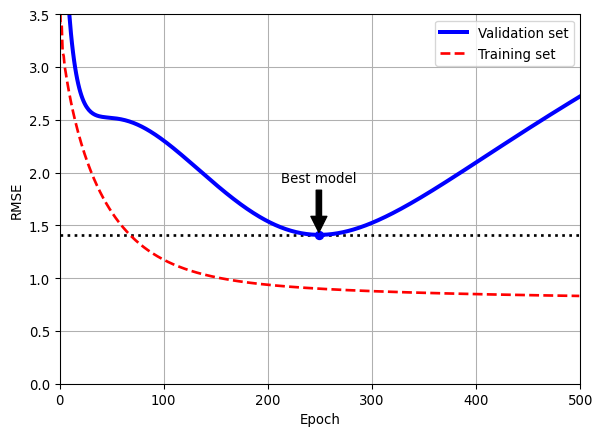

**Attribution**: Géron (2022),
[04_training_linear_models.ipynb](https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb).

# Prologue

## Summary

-   **Loss Functions:**
    -   **Regression Tasks:** Mean Squared Error (MSE).
    -   **Classification Tasks:** Cross-Entropy Loss with Softmax
        activation for multi-class outputs.
-   **Regularization Techniques:**
    -   **L1 and L2 Regularization:** Add penalty terms to the loss to
        discourage large weights.
    -   **Dropout:** Randomly deactivate neurons during training to
        prevent overfitting.
    -   **Early Stopping:** Halt training when validation performance
        deteriorates.

## Next lecture

-   We will introduce various architectures of artificial neural
    networks.

## References

Géron, Aurélien. 2022. *Hands-on Machine Learning with Scikit-Learn,
Keras, and TensorFlow*. 3rd ed. O’Reilly Media, Inc.

Hinton, Geoffrey E., Nitish Srivastava, Alex Krizhevsky, Ilya Sutskever,
and Ruslan Salakhutdinov. 2012. “Improving Neural Networks by Preventing
Co-Adaptation of Feature Detectors.” *CoRR* abs/1207.0580.
<http://arxiv.org/abs/1207.0580>.

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa